# DBSCAN

DBSCAN stands for "density-based spatial clustering of applications with noise".

* It does not require the number of clusters a priori;
* It can capture clusters of complex shapes;
* It can identify points that are not part of any cluster;
* It is slower than agglomerative clustering and k-means;
* It always produce the same results for core points and noises.

DBSCAN aims to find dense regions and has two parameters:
    eps: radius to scan for points nearby;
    min_samples: minimum of points within eps to consider a core point.

MAIN CONCEPTS:
* core samples (core points): a point the has at least "min_samples" other points within "eps" distance;
* boundary points: points within "eps" distance;
* noise: points that does not have "min_samples" other points within "eps" distance;

# Applying DBSCAN to synthetic dataset

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


As a results of default parameter settings, all points are labeled as noise. Below we can see DBSCAN's results for several combinations of values for eps and min_samples.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


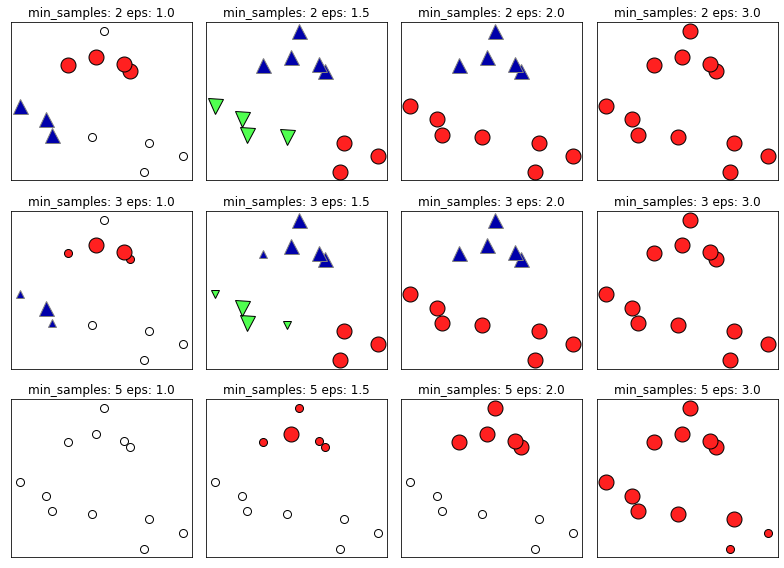

In [8]:
import mglearn
mglearn.plots.plot_dbscan();

Increasing eps also increases clusters' size and decreases # of clusters. Increasing min_samples decreases # of core points and increases # of noises.

Finding a good setting for eps can be easier for scaled datasets (after applying StandardScaler, MinMaxScaler).

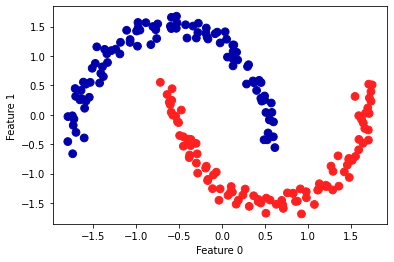

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");